<a href="https://colab.research.google.com/github/paolasouza/ml_classification_marketing/blob/main/Classificacao_Marketing_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

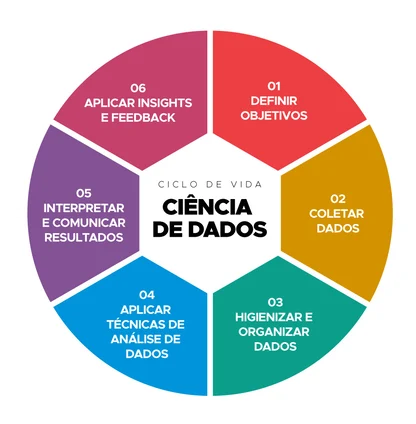

## Conceito

A Inteligência Artificial (IA) tem se destacado como uma das áreas de maior crescimento e visibilidade nos últimos anos. É um campo de estudo amplo que abrange diversas áreas do conhecimento, tanto práticas quanto teóricas, incluindo a ciência da computação, a ciência cognitiva, a filosofia da mente e o Machine Learning (Aprendizagem de Máquina).

O Machine Learning (ML), como uma subárea da inteligência artificial, se concentra no desenvolvimento de algoritmos que são utilizados no computador para realizar tarefas sem a necessidade de programar explicitamente as regras que serão utilizadas. Esses algoritmos baseiam suas decisões a partir de dados com o objetivo de compreender e identificar o padrão existente nesses dados, para então utilizar esse conhecimento na realização das predições.

Como funciona o Machine Learning
O funcionamento do Machine Learning tem 3 etapas principais:

1 - Coleta dos dados

A primeira etapa de um projeto de ML é a extração ou coleta de dados. Os dados são essenciais e podem ser considerados a matéria-prima dos algoritmos. A quantidade e qualidade desses dados têm um impacto muito grande no aprendizado dos modelos. Com poucos dados, o modelo pode não ter informações suficientes para aprender. Com dados de pouca qualidade, o modelo pode não conseguir diferenciar bem o padrão dos dados ou compreender o padrão de forma diferente do que ocorre com os dados do mundo real.

2 - Treinamento dos modelos

Após coletar dados e assegurar que estão com qualidade, chega à etapa de treinar os modelos. O treinamento consiste no algoritmo procurar o padrão presente nos dados e construir uma regra para tomar decisões posteriormente em novos dados.

3 - Avaliação

Com o modelo treinado, chega a etapa de avaliar o desempenho do modelo, para identificar se realmente aprendeu o padrão dos dados e se é capaz de aplicar de forma satisfatória a regra gerada pelo algoritmo em dados novos, que não foram utilizados durante o momento do treinamento.

Apesar de serem as etapas principais, essas não são as únicas tarefas presentes em projetos de Machine Learning. Cada projeto tem suas próprias características, seja pelo formato e natureza dos dados, ao tipo de aplicação ou aos desafios encontrados ao longo do processo.

## Aprendizados

Dentro da área de Machine Learning, existem diferentes tipos de aprendizado: o supervisionado, semi supervisionado, não supervisionado e por reforço. A tarefa de classificação é apenas uma dentre as tarefas realizadas pelos algoritmos, que faz parte do aprendizado supervisionado. Com o organograma a seguir, perceba os fluxos que são estabelecidos nessas relações.


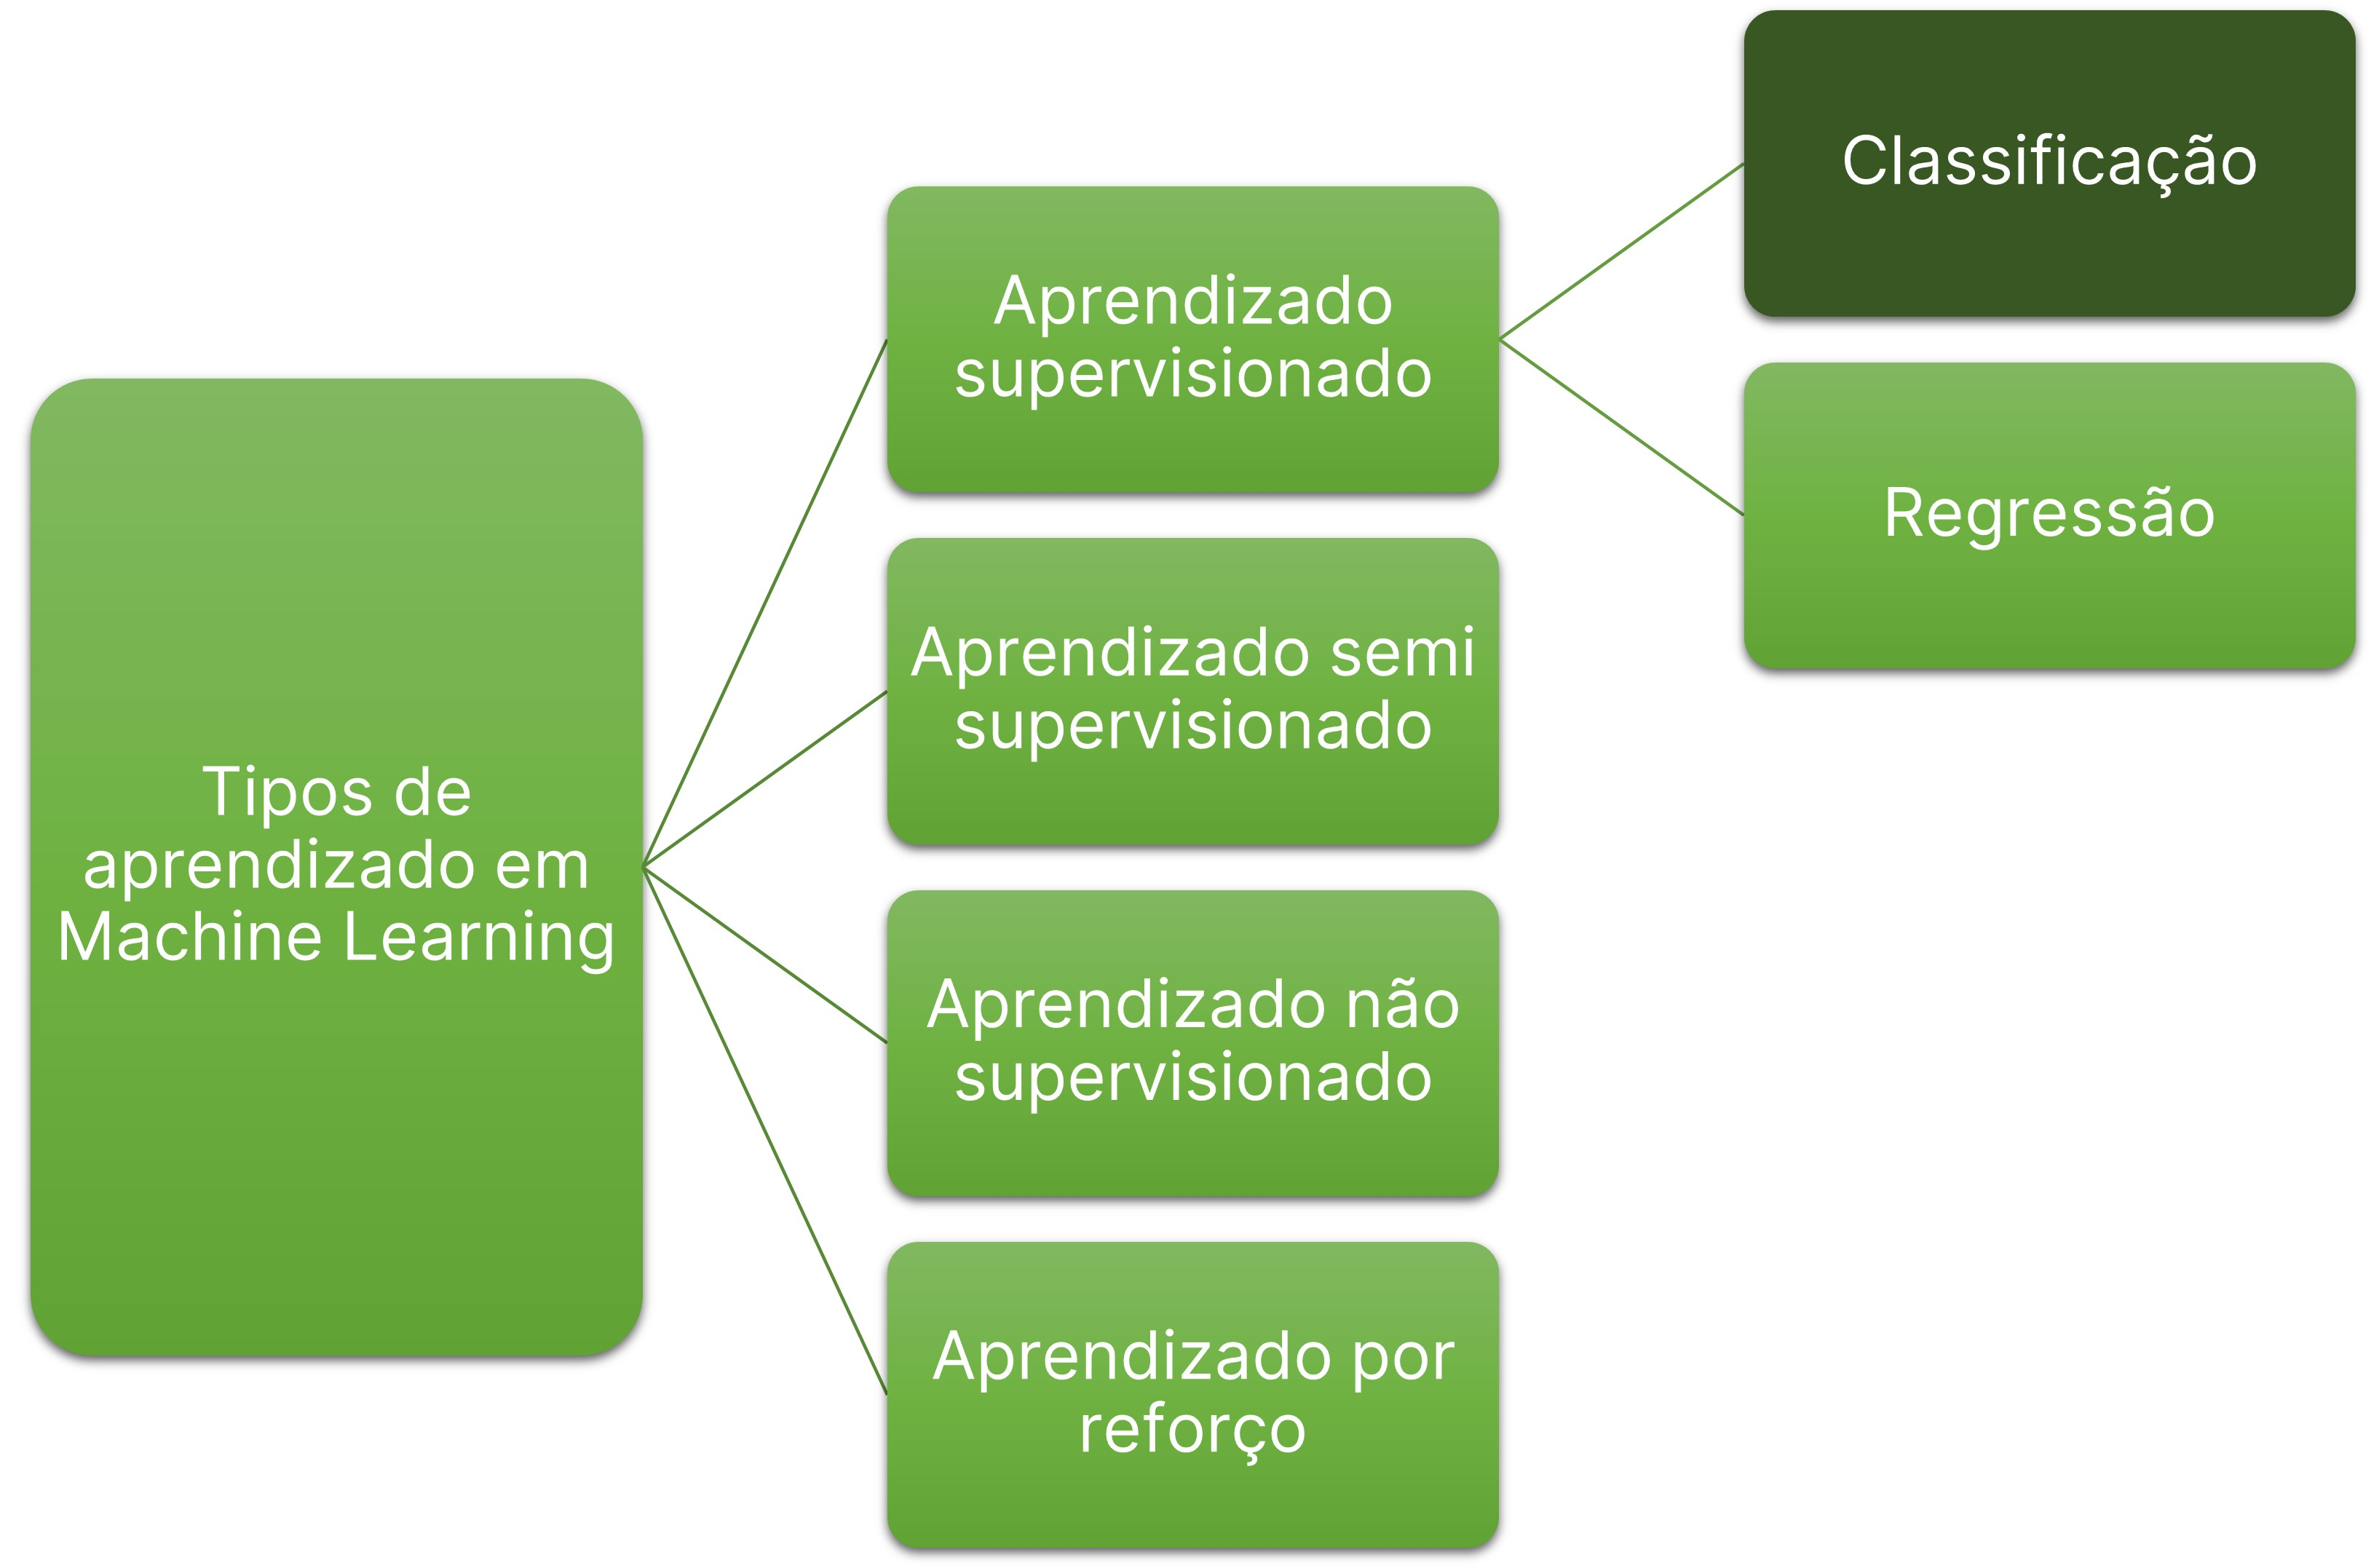
Imagine um grupo de jovens que está aprendendo a identificar diferentes estilos musicais. Eles têm um mentor que possui uma coleção de músicas em seu dispositivo de áudio, cada uma devidamente rotulada com o gênero musical correspondente, porém os jovens não conseguem distinguir os gêneros musicais por conta própria. No início, o mentor começa a reproduzir várias músicas e, ao mesmo tempo, diz qual é o gênero de cada uma delas. Eles ouvem com atenção e, ao longo do tempo, começam a associar as características musicais, como batida, instrumentação e vocais, aos diferentes gêneros.

Nesse exemplo, os jovens baseiam-se em algumas características como batidas rápidas e vocais energéticos encaixando ao gênero pop, enquanto músicas com guitarras distorcidas e vocais mais intensos são direcionadas ao gênero rock. Com base nesse processo, os jovens conseguem identificar o gênero de novas músicas que não foram previamente rotuladas pelo mentor, porém usando as regras que eles aprenderam, foram capazes de rotular e nomear os novos elementos.

O aprendizado supervisionado em Machine Learning segue esse mesmo raciocínio. Ele utiliza conjuntos de dados rotulados, isto é, base de dados com registros históricos contendo a resposta correta em cada um dos registros. Para então, a partir dessa resposta e das características dos dados, o algoritmo ser capaz de traçar uma regra para se chegar até a resposta que poderá ser usada posteriormente em novos dados, no intuito de fazer uma predição.

A característica principal da classificação se dá pelo tipo do dado presente na resposta, que precisa ser do tipo categórica. Um dado do tipo categórico é aquele que possui diferentes classes ou categorias. Como exemplos de aplicações de classificação com Machine Learning, temos:

Filtragem de e-mails spams
Diagnósticos médicos
Análise textual de sentimentos
Detecção de fraudes bancárias


# Classificação: Marketing em Investimentos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [2]:
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/paolasouza/ml_marketing_investing/refs/heads/main/marketing_investimento.csv", sep=";")
data.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [4]:
print(data["estado_civil"].unique())
print(data["inadimplencia"].unique())
print(data["fez_emprestimo"].unique())
print(data["escolaridade"].unique())
print(data["aderencia_investimento"].unique())

['casado (a)' 'solteiro (a)' 'divorciado (a)']
['nao' 'sim']
['nao' 'sim']
['superior' 'medio' 'fundamental']
['sim' 'nao']


In [5]:
import plotly.express as px
fig = px.histogram(data,
                   x="aderencia_investimento",
                   text_auto = True)
fig.show()

In [6]:
fig = px.histogram(data,
                   x="estado_civil",
                   text_auto = True,
                   color = "aderencia_investimento",
                   barmode = "group"
                   )
fig.show()

In [7]:
fig = px.histogram(data,
                   x="inadimplencia",
                   text_auto = True,
                   color = "aderencia_investimento",
                   barmode = "group"
                   )
fig.show()

In [8]:
fig = px.histogram(data,
                   x="escolaridade",
                   text_auto = True,
                   color = "aderencia_investimento",
                   barmode = "group"
                   )
fig.show()

### Variáveis numéricas

In [9]:
px.box(data, y="idade", color="aderencia_investimento")

In [10]:
px.box(data, x="saldo", color="aderencia_investimento")

# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [11]:
x = data.drop("aderencia_investimento", axis=1)
y = data["aderencia_investimento"]

In [12]:
x.head(2)

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4


In [13]:
y.head(2)

,aderencia_investimento
0,sim
1,sim


## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

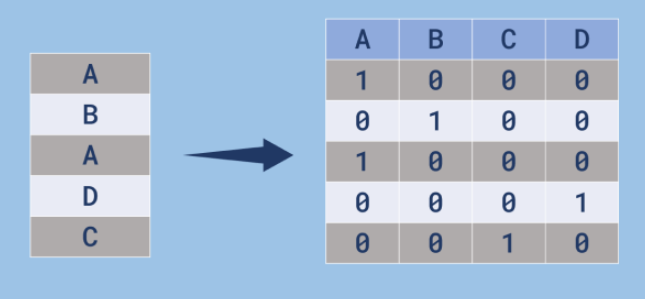

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
colunas = x.columns
colunas

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos'],
      dtype='object')

In [66]:
one_hot = make_column_transformer( (OneHotEncoder(drop="if_binary"), ['estado_civil', 'escolaridade',
                                             'inadimplencia', 'fez_emprestimo'] ),
                         remainder = 'passthrough', #não excluir valores numericos
                         sparse_threshold = 0 #não criar matriz esparsa
                        )
encoder = one_hot.fit(x)
X = encoder.transform(x)

In [67]:
encoder

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['estado_civil', 'escolaridade',
                                  'inadimplencia', 'fez_emprestimo'])])

In [18]:
X

array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [19]:
colunas_novas = one_hot.get_feature_names_out(colunas)
colunas_novas

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [20]:
pd.DataFrame(X, columns=colunas_novas)

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
label_enconder = LabelEncoder()
y = label_enconder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])

# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de **treinamento** são usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

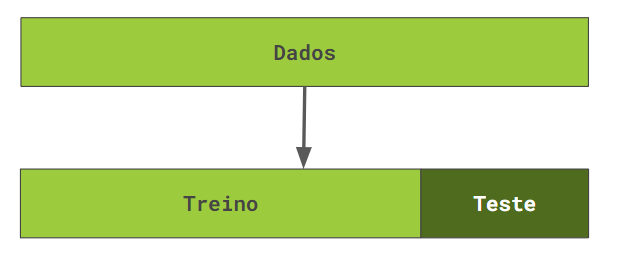

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_test, x_train, y_test, y_train = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1234)

## Modelo de base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [25]:
from sklearn.dummy import DummyClassifier

In [26]:
#o algoritmo Dummy é usado para o modelo
dummy = DummyClassifier()

#ajusta um modelo Dummy aos dados de treino
dummy.fit(x_train, y_train)

DummyClassifier()

In [27]:
#previsões (teste)
dummy.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
dummy.score(x_test, y_test)

0.6046267087276551

## Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [30]:
tree = DecisionTreeClassifier(max_depth=3, random_state=4321)
tree = tree.fit(x_train, y_train)

In [31]:
tree.score(x_test, y_test)

0.729758149316509

In [32]:
colunas_novas

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [33]:
colunas_tree = ['casado (a)',
       'divorciado (a)',
       'solteiro (a)',
       'fundamental',
       'medio',
       'superior',
       'inadimplencia',
       'fez_emprestimo',
        'idade',
       'saldo', 'tempo_ult_contato',
       'numero_contatos']

[Text(0.5, 0.875, 'tempo_ult_contato <= 323.5\ngini = 0.479\nsamples = 317\nvalue = [191.0, 126.0]\nclass = sim'),
 Text(0.25, 0.625, 'tempo_ult_contato <= 152.5\ngini = 0.34\nsamples = 198\nvalue = [155, 43]\nclass = sim'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'idade <= 21.5\ngini = 0.154\nsamples = 95\nvalue = [87, 8]\nclass = sim'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = não'),
 Text(0.1875, 0.125, 'gini = 0.138\nsamples = 94\nvalue = [87, 7]\nclass = sim'),
 Text(0.375, 0.375, 'idade <= 57.5\ngini = 0.449\nsamples = 103\nvalue = [68, 35]\nclass = sim'),
 Text(0.3125, 0.125, 'gini = 0.407\nsamples = 88\nvalue = [63.0, 25.0]\nclass = sim'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = não'),
 Text(0.75, 0.625, 'fundamental <= 0.5\ngini = 0.422\nsamples = 119\nvalue = [36, 83]\nclass = não'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'casado (a) <= 0.5\ngini = 0.461\nsamples = 97\nvalue = [35.0, 62.0]\

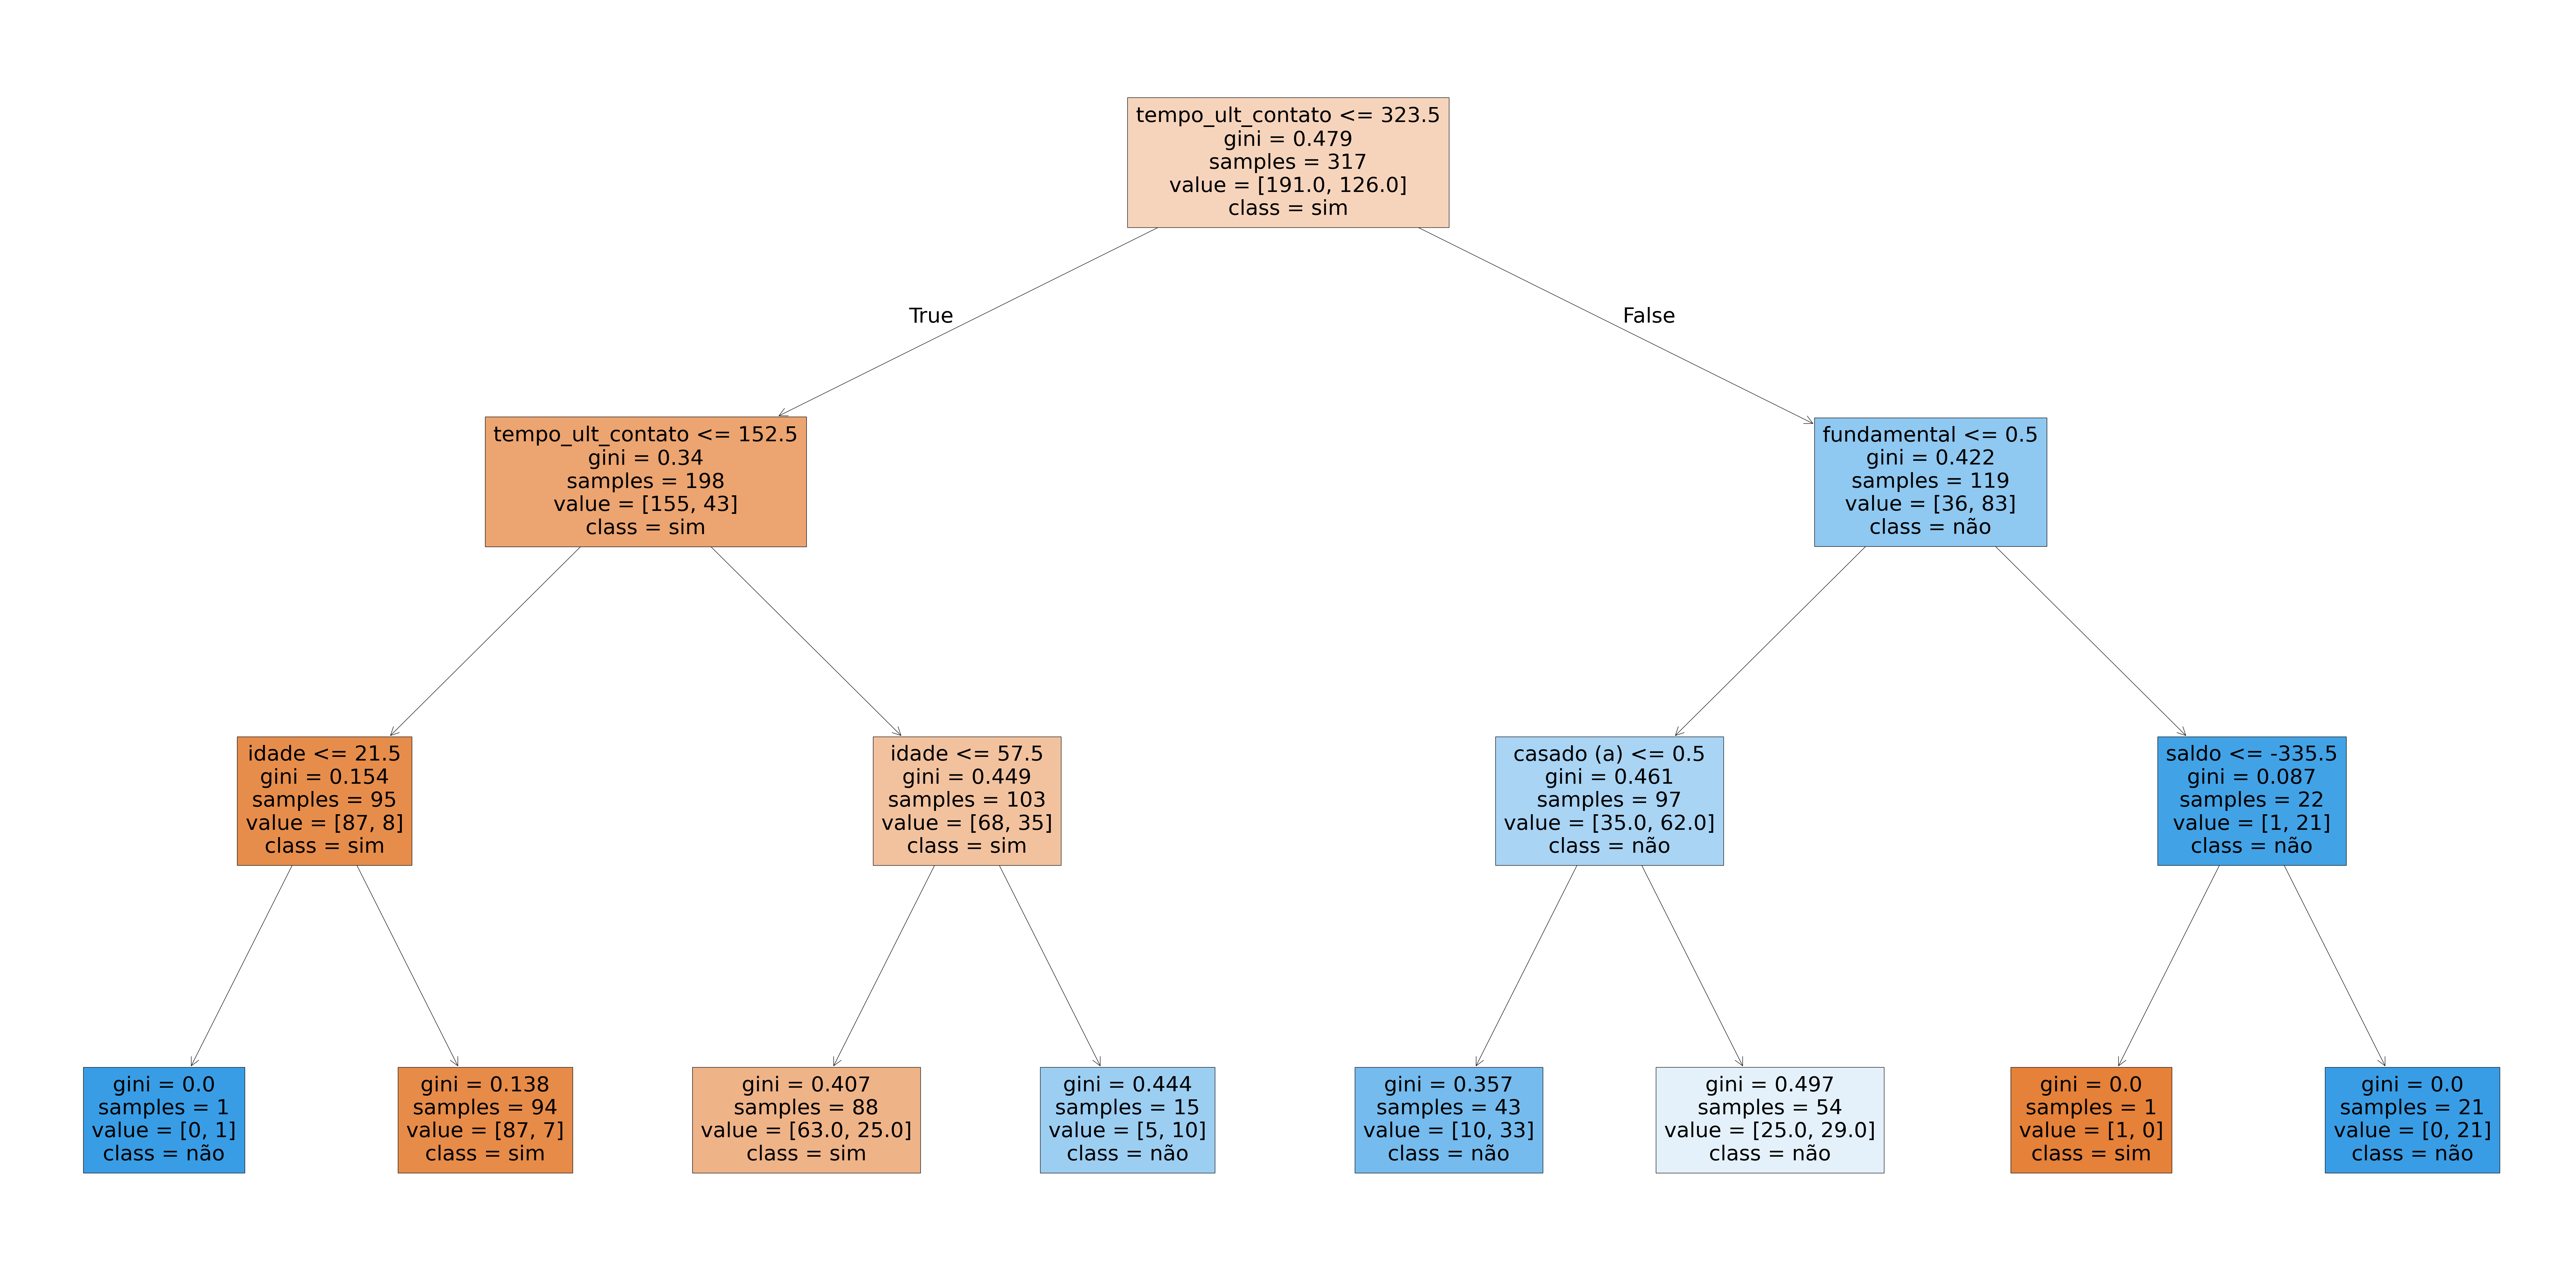

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,50))
plot_tree(tree, feature_names=colunas_tree, class_names=['sim','não'], filled=True)

# Seleção de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas **idade** e **salário**, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [37]:
from sklearn.preprocessing import MinMaxScaler


In [43]:
minmax = MinMaxScaler()

In [44]:
x_train_normalized = minmax.fit_transform(x_train)
x_test_normalized = minmax.transform(x_test)

## KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [46]:
# importar o modulo sklearn.neighbors KNClassifier
# instanciar a o objeto da classe KNClassifier
# 1 - Criar um modelo a partir de um algoritmo
# objeto.fit(x_treino_normalizado) - cria o modelo
# 2-  Validação
#  modelo base, score (x_teste_normalizado, y_teste)
# 3 - Previsões
# objeto.predict(x_novo)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
modelo_knn = knn.fit(x_train_normalized, y_train)
validacao = modelo_knn.score(x_test_normalized, y_test)
print(validacao)




0.6729758149316509


## Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.


In [50]:
print(f"Score Dummy: {round(dummy.score(x_test, y_test),2)}")
print(f"Score Árvore de Decisão: {round(tree.score(x_test, y_test),2)}")
print(f"Score KNN: {round(modelo_knn.score(x_test_normalized, y_test),2)}")

Score Dummy: 0.6
Score Árvore de Decisão: 0.73
Score KNN: 0.67


## Pickle Dump


Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

In [92]:
pd.to_pickle(tree, 'modelo_arvore_inadimplencia.pkl')
pd.to_pickle(encoder, "onehotenconder.pkl")

## Usando o modelo

In [93]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [84]:
one_hot = pd.read_pickle('onehotenconder.pkl')


ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['estado_civil', 'escolaridade',
                                  'inadimplencia', 'fez_emprestimo'])])

In [90]:
novo_dado = one_hot.transform(novo_dado)

ValueError: Found unknown categories ['não'] in column 2 during transform

In [79]:
modelo_arvore = pd.read_pickle('modelo_arvore_inadimplencia.pkl')
modelo_arvore.predict(novo_dado)

array([1])